In [1]:
import sys
sys.path.append('../')
import giancarlo as gc

# Currents, fields

In [2]:
Qu = gc.Symbol('Q_u')
Qd = gc.Symbol('Q_d')
e = gc.Symbol('e')

u, ubar = gc.SpinorField('u')
d, dbar = gc.SpinorField('d')

def Jgamma(x, mu):
    a, b = gc.default.var(), gc.default.var()
    up = Qu * ubar(x, a) * gc.DiracGamma(mu, a, b) * u(x, b)
    down = Qd * dbar(x, a) * gc.DiracGamma(mu, a, b) * d(x, b)
    return up + down

def Jp(x, mu):
    a, b = gc.default.var(), gc.default.var()
    return dbar(x, a) * gc.DiracGamma(mu, a, b) * u(x, b)

def Jn(x, mu):
    a, b = gc.default.var(), gc.default.var()
    return ubar(x, a) * gc.DiracGamma(mu, a, b) * d(x, b)

Jgamma('x', r'\mu')

( Q_u\,\bar{u}(x)\,G(\mu)\,G(\mu)\,u(x) + Q_d\,\bar{d}(x)\,G(\mu)\,G(\mu)\,d(x) )

# HVP in ISO QCD

In [3]:
hvp = Jgamma('x', r'\mu') * Jgamma('y', r'\nu')
for c in hvp.wick(trace_indices=['spin']):
    gc.log(c)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Do some simplifications by imposing up=down

In [4]:
hvp_simp = hvp.wick(trace_indices=['spin']).replace({'S_u': 'S', 'S_d': 'S'}).simplify()
hvp_simp

( ( Q_u^2 + 2\,Q_d\,Q_u + Q_d^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S(y, y) ] + ( Q_u^2 + Q_d^2 )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, y)\,\gamma_{\nu}\,S(y, x) ] )

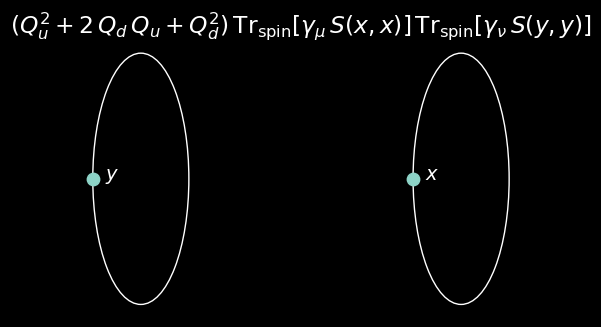

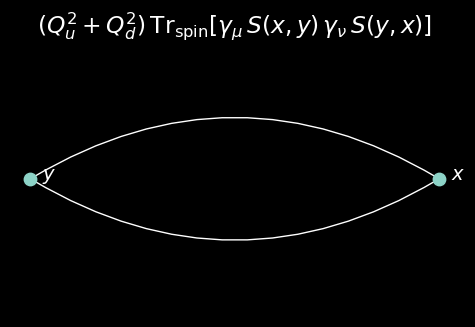

In [5]:
gc.PlotStyle.style = 'dark_background'
hvp_simp.draw()

# Isospin components

In [6]:
Qp = gc.Symbol('Q_+')
Qm = gc.Symbol('Q_-')

def Jgamma_iso(x, mu, i=None):
    a = [gc.default.var()]*4
    up = ubar(x,a[0]) * gc.DiracGamma(mu,a[0],a[1]) * u(x,a[1])
    down = dbar(x,a[2]) * gc.DiracGamma(mu,a[2], a[3]) * d(x,a[3])
    if i==0:
        return gc.CNumber(1,2) * Qp * (up+down)
    elif i==1:
        return gc.CNumber(1,2) * Qm * (up - down)
    return gc.CNumber(1,2) * Qp * (up+down) + (gc.CNumber(1,2) * Qm * (up - down))

Jgamma_iso('x', 'mu')

( \frac{1}{2}\,Q_+\,\bar{u}(x)\,G(mu)\,G(mu)\,u(x) + \frac{1}{2}\,Q_+\,\bar{d}(x)\,G(mu)\,G(mu)\,d(x) + \frac{1}{2}\,Q_-\,\bar{u}(x)\,G(mu)\,G(mu)\,u(x) + \frac{-1}{2}\,Q_-\,\bar{d}(x)\,G(mu)\,G(mu)\,d(x) )

In [7]:
hvp = Jgamma_iso('x', r'\mu') * Jgamma_iso('y', r'\nu')
for c in hvp.wick(trace_indices=['spin']).replace({'S_u': 'S', 'S_d': 'S'}).simplify():
    gc.log(c)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Strong isospin-breaking correction

In [8]:
dmu = gc.Symbol(r'\Delta_{m_u}')
dmd = gc.Symbol(r'\Delta_{m_d}')

def Scalar(x):
    a, b = gc.default.var(), gc.default.var()
    return dmu * ubar(x, a) * u(x, a) + dmd * dbar(x, b) * d(x, b)

hvp_sib = Jgamma_iso('x', r'\mu') * Scalar('z') * Jgamma_iso('y', r'\nu')
hvp_sib_s = hvp_sib.wick(trace_indices=['spin']).replace({'S_u': 'S', 'S_d': 'S'}).simplify()
hvp_sib_s

( ( Q_+^2\,\Delta_{m_u} + Q_+^2\,\Delta_{m_d} )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ S(z, z) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S(y, y) ] + ( \frac{1}{2}\,Q_+^2\,\Delta_{m_u} + \frac{1}{2}\,Q_+\,Q_-\,\Delta_{m_u} + \frac{1}{2}\,Q_+^2\,\Delta_{m_d} + \frac{-1}{2}\,Q_+\,Q_-\,\Delta_{m_d} )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, x) ]\,\mathrm{Tr}_\mathrm{spin} [ S(z, y)\,\gamma_{\nu}\,S(y, z) ] + ( \frac{1}{2}\,Q_+^2\,\Delta_{m_u} + \frac{1}{2}\,Q_+\,Q_-\,\Delta_{m_u} + \frac{1}{2}\,Q_+^2\,\Delta_{m_d} + \frac{-1}{2}\,Q_+\,Q_-\,\Delta_{m_d} )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, z)\,S(z, x) ]\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\nu}\,S(y, y) ] + ( \frac{1}{4}\,Q_+^2\,\Delta_{m_u} + \frac{1}{2}\,Q_+\,Q_-\,\Delta_{m_u} + \frac{1}{4}\,Q_+^2\,\Delta_{m_d} + \frac{-1}{2}\,Q_+\,Q_-\,\Delta_{m_d} + \frac{1}{4}\,Q_-^2\,\Delta_{m_u} + \frac{1}{4}\,Q_-^2\,\Delta_{m_d} )\,\mathrm{Tr}_\mathrm{spin} [ \gamma_{\mu}\,S(x, z)\,S(

In [9]:
hvp_sib_s[0][0]

( Q_+^2\,\Delta_{m_u} + Q_+^2\,\Delta_{m_d} )

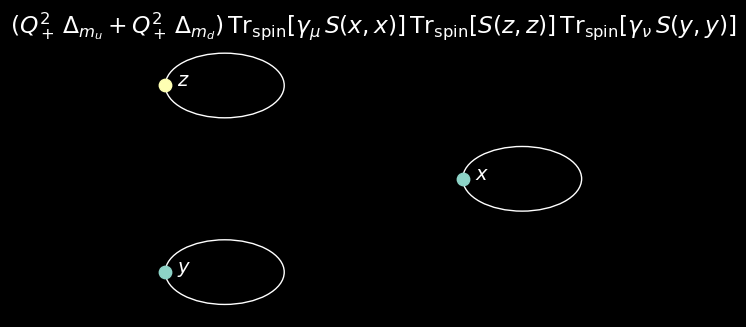

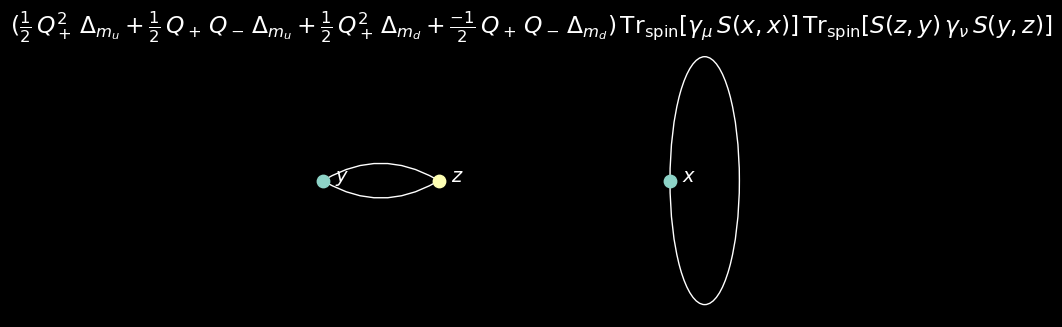

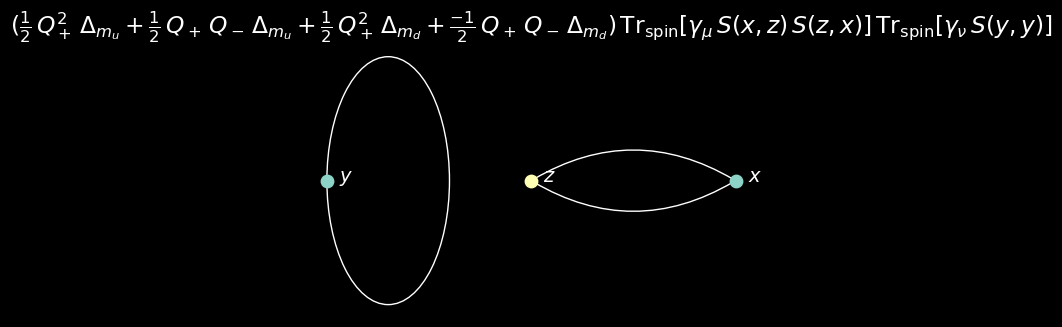

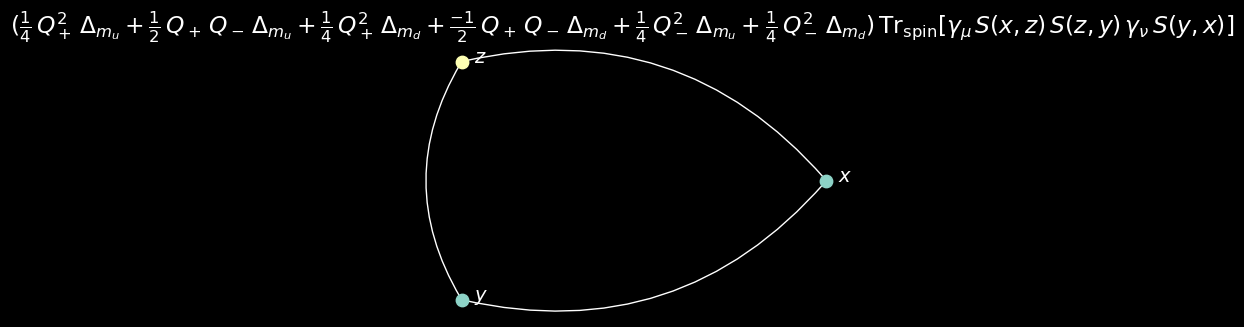

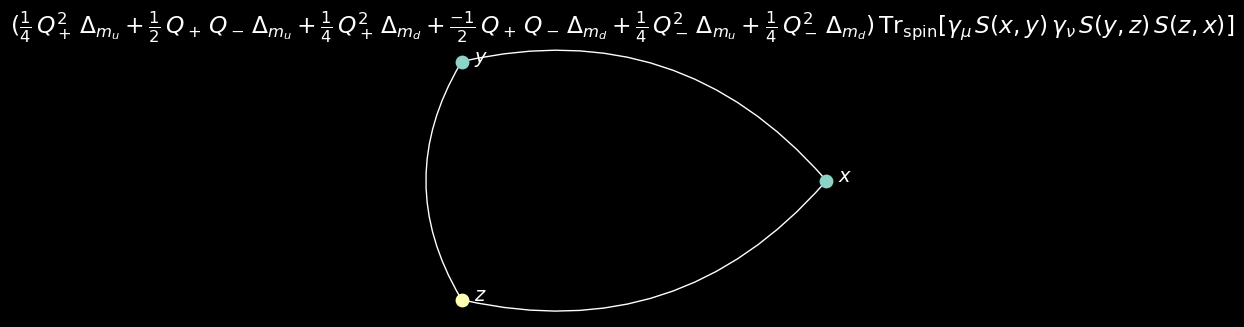

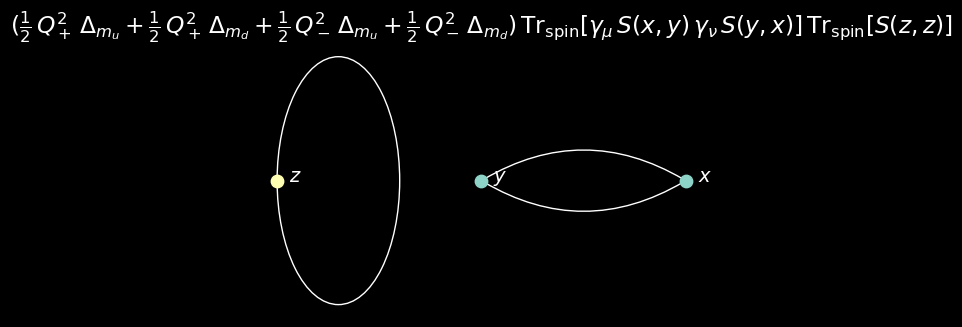

In [10]:
gc.PlotStyle.points['z'] = gc.PlotStyle.point(color='C1')
hvp_sib_s.draw()

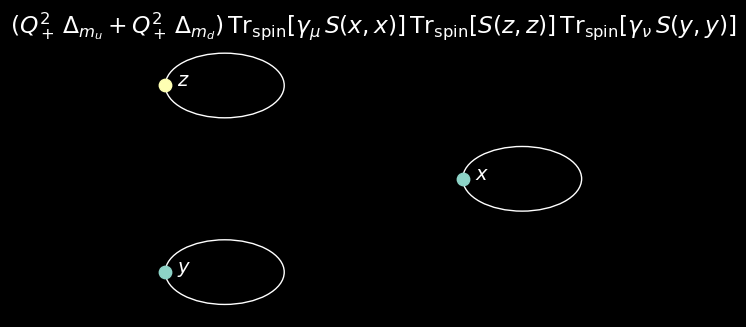

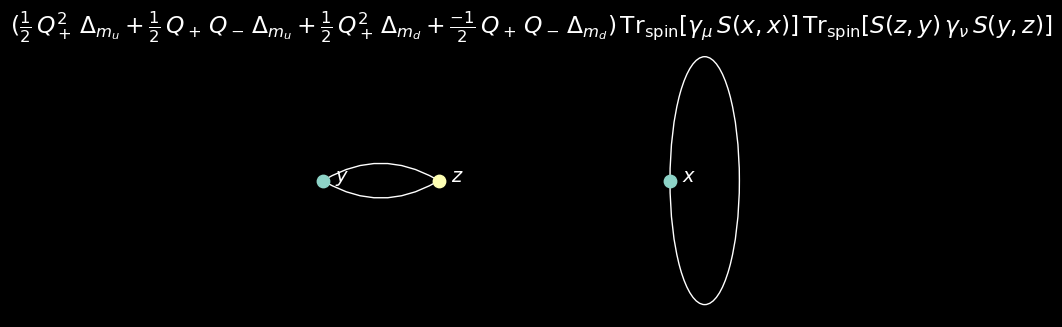

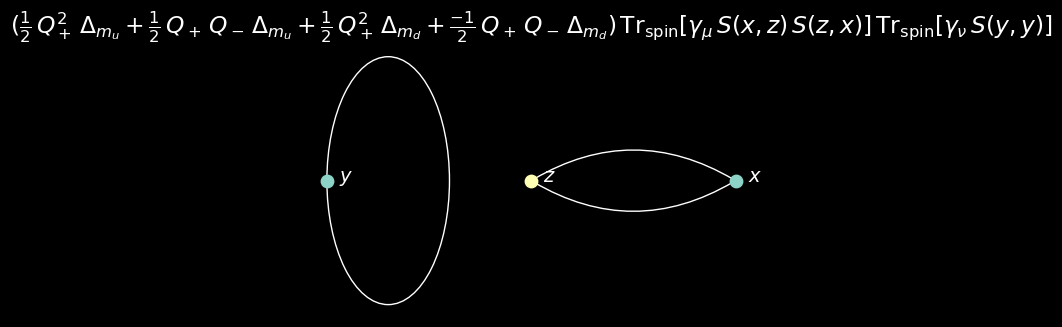

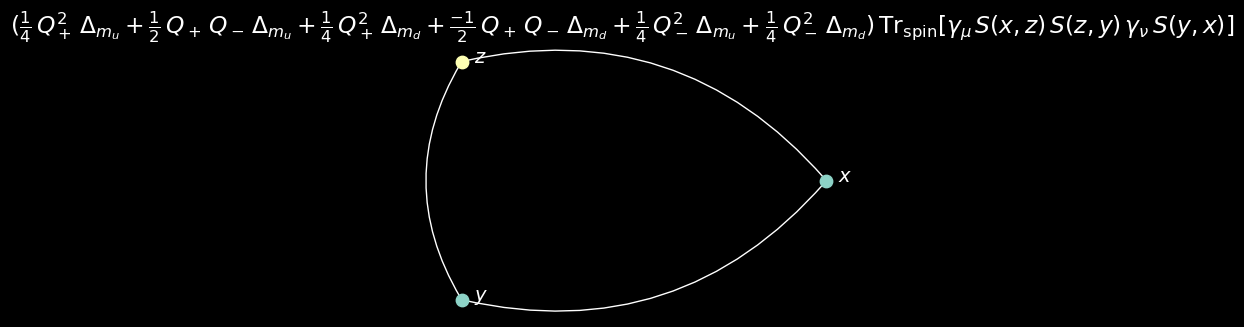

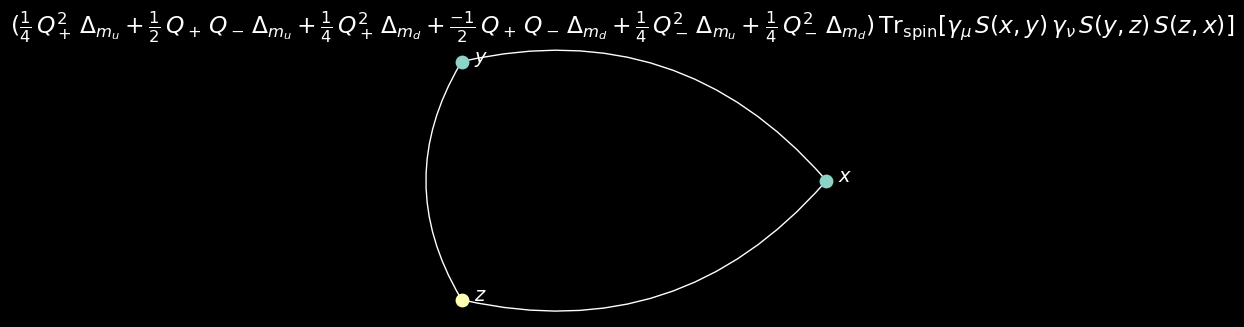

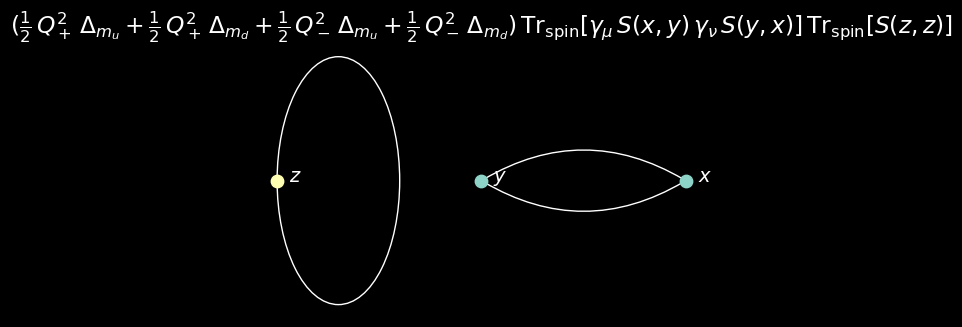

In [13]:
hvp_sib.wick(trace_indices=['spin']).replace({'S_u': 'S', 'S_d': 'S'}).simplify(gc.symmetry('pos', 'x', 'y'),gc.symmetry('lorentz', r'\mu', r'\nu')).draw()

# QED corrections

In [12]:
gc.PlotStyle.points['z1'] = gc.PlotStyle.point(color='C2')
gc.PlotStyle.points['z2'] = gc.PlotStyle.point(color='C2')

hvp_qed = Jgamma_iso('x', r'\mu') * Jgamma_iso('z1',r'\alpha') * Jgamma_iso('z2', r'\beta') * Jgamma_iso('y', r'\nu')
hvp_qed_s = hvp_qed.wick(trace_indices=['spin']).replace({'S_u': 'S', 'S_d': 'S'}).simplify()

for el in hvp_qed_s:
    gc.log(el)

hvp_qed_s.draw()

KeyboardInterrupt: 